In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon.zip" -d "/content/drive/MyDrive/Artificial Intelligent and Machine Learning"

Archive:  /content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon.zip
  inflating: /content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: /content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/test/acai/images (2).jpeg  
  inflating: /content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: /content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/test/acai/images (16).jpeg  
  inflating: /content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: /content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: /content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: /content/driv

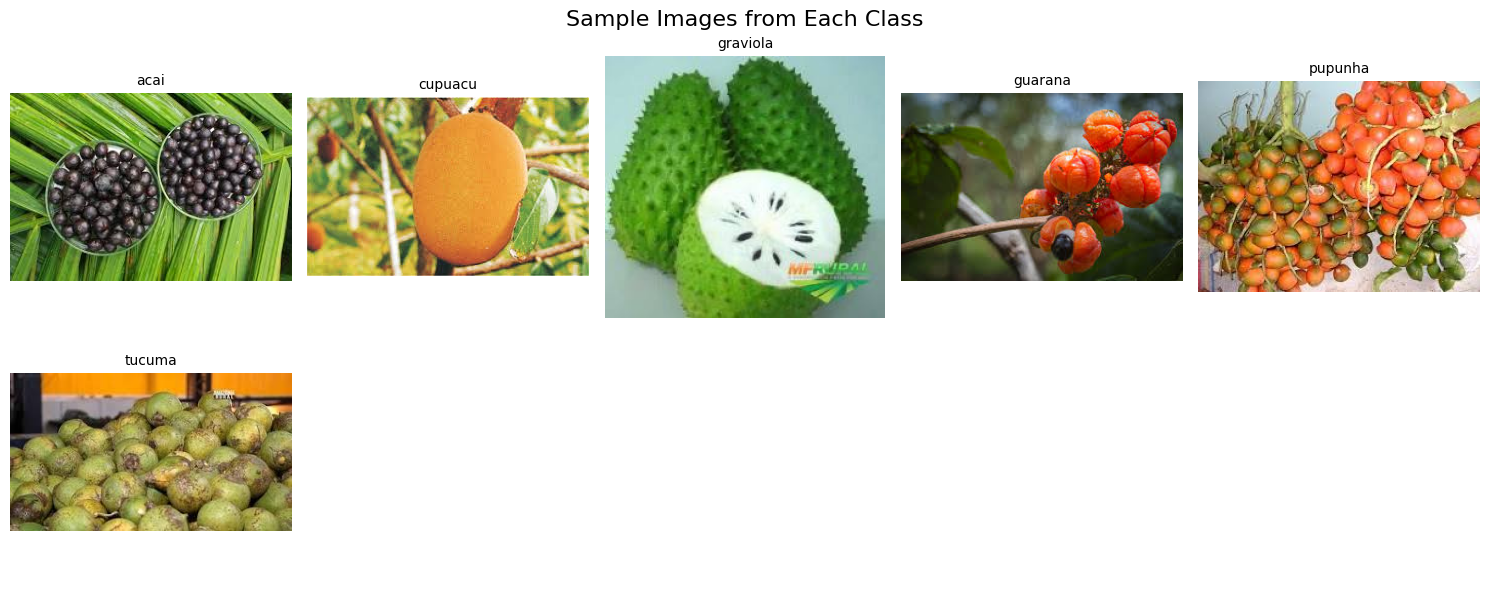

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [4]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [5]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Swornim KC.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.1331 - loss: 1.8140
Epoch 1: val_loss improved from inf to 1.43742, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.1450 - loss: 1.8166 - val_accuracy: 0.7778 - val_loss: 1.4374
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.2703 - loss: 1.7220
Epoch 2: val_loss did not improve from 1.43742
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step - accuracy: 0.2687 - loss: 1.7236 - val_accuracy: 0.7778 - val_loss: 1.5132
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.4902 - loss: 1.5594
Epoch 3: val_loss did not improve from 1.43742
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - accuracy: 0.4891 - loss: 1.5527 - val_accuracy: 0.0000e+00 - val_loss: 2.5083
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.2523 - loss: 1.7739
Epoch 4: val_loss improved from 1.43742 to 1.27476, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 859ms/step - accuracy: 0.2691 - loss: 1.7492 - val_accuracy: 0.7222 - val_loss: 1.2748
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.5741 - loss: 1.2131
Epoch 5: val_loss did not improve from 1.27476
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step - accuracy: 0.5799 - loss: 1.2094 - val_accuracy: 0.5556 - val_loss: 1.5186
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.5648 - loss: 1.2158
Epoch 6: val_loss did not improve from 1.27476
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 522ms/step - accuracy: 0.5660 - loss: 1.2076 - val_accuracy: 0.4444 - val_loss: 1.4207
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8009 - loss: 0.8436
Epoch 7: val_loss improved from 1.27476 to 0.96356, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.7951 - loss: 0.8464 - val_accuracy: 0.8333 - val_loss: 0.9636
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.8617 - loss: 0.7426
Epoch 8: val_loss improved from 0.96356 to 0.84720, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 559ms/step - accuracy: 0.8511 - loss: 0.7531 - val_accuracy: 0.7778 - val_loss: 0.8472
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.6331 - loss: 0.7806
Epoch 9: val_loss improved from 0.84720 to 0.67931, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 873ms/step - accuracy: 0.6450 - loss: 0.7665 - val_accuracy: 0.7778 - val_loss: 0.6793
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.9294 - loss: 0.3632
Epoch 10: val_loss did not improve from 0.67931
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 693ms/step - accuracy: 0.9332 - loss: 0.3630 - val_accuracy: 0.7222 - val_loss: 0.7527
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.9699 - loss: 0.2659
Epoch 11: val_loss improved from 0.67931 to 0.51010, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.9705 - loss: 0.2582 - val_accuracy: 0.8889 - val_loss: 0.5101
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9902 - loss: 0.1547
Epoch 12: val_loss improved from 0.51010 to 0.48464, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 573ms/step - accuracy: 0.9891 - loss: 0.1524 - val_accuracy: 0.8889 - val_loss: 0.4846
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 1.0000 - loss: 0.0869
Epoch 13: val_loss improved from 0.48464 to 0.39170, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 1.0000 - loss: 0.0857 - val_accuracy: 0.8889 - val_loss: 0.3917
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 1.0000 - loss: 0.0465
Epoch 14: val_loss improved from 0.39170 to 0.38827, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 860ms/step - accuracy: 1.0000 - loss: 0.0463 - val_accuracy: 0.8889 - val_loss: 0.3883
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 1.0000 - loss: 0.0371
Epoch 15: val_loss improved from 0.38827 to 0.30289, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 829ms/step - accuracy: 1.0000 - loss: 0.0363 - val_accuracy: 0.8889 - val_loss: 0.3029
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0192
Epoch 16: val_loss improved from 0.30289 to 0.28748, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 0.8889 - val_loss: 0.2875
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 1.0000 - loss: 0.0134
Epoch 17: val_loss improved from 0.28748 to 0.27243, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 509ms/step - accuracy: 1.0000 - loss: 0.0130 - val_accuracy: 0.8889 - val_loss: 0.2724
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 1.0000 - loss: 0.0063
Epoch 18: val_loss improved from 0.27243 to 0.26157, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 563ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.8889 - val_loss: 0.2616
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 19: val_loss did not improve from 0.26157
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 531ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.8889 - val_loss: 0.2668
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 1.0000 - loss: 0.0033
Epoch 20: val_loss did not improve from 0.26157
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 767ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8889 - val_loss: 0.2736
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 21: val_loss did not improve from 0.26157
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8889 - val_loss: 0.2758
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 22: val_loss did not improve from 0.26157
3/3 

In [9]:
test_dir = '/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.6000 - loss: 243.8053
Test Loss: 243.80531311035156
Test Accuracy: 0.6000000238418579


In [10]:

model.save('Prince_Shrestha_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.30      0.60      0.40         5
           2       0.71      1.00      0.83         5
           3       0.67      0.40      0.50         5
           4       0.75      0.60      0.67         5
           5       1.00      0.40      0.57         5

    accuracy                           0.60        30
   macro avg       0.70      0.60      0.61        30
weighted avg       0.70      0.60      0.61        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 1: val_loss did not improve from 0.26157
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 775ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.8889 - val_loss: 0.2699
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 2: val_loss did not improve from 0.26157
3/3 ━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.8889 - val_loss: 0.2613
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 6: val_loss improved from 0.26133 to 0.24845, saving model to Swornim KC.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 795ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8889 - val_loss: 0.2484
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 7: val_loss did not improve from 0.24845
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 725ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8889 - val_loss: 0.2578
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 8: val_loss did not improve from 0.24845
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8889 - val_loss: 0.2582
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 9: val_loss did not improve from 0.24845
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8889 - val_loss: 0.2617
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 10: val_loss did not improve from 0.24845
3/3 ━━━━━━

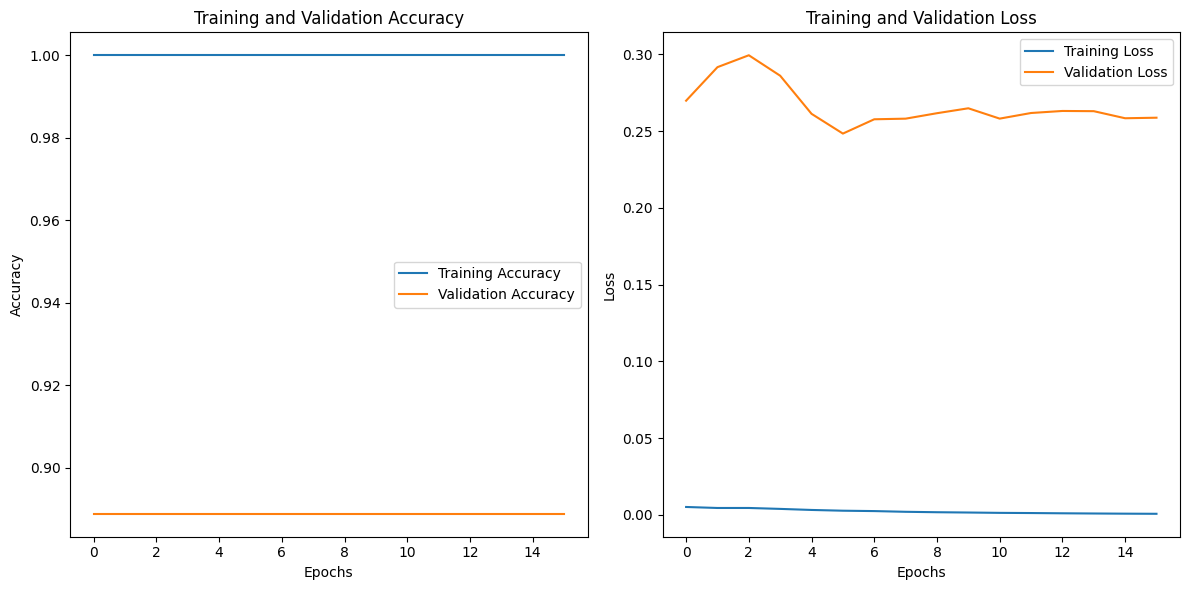

Model saved as 'Prince_Shrestha_model.h5'


In [11]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('Prince_Shrestha_model.h5')
print("Model saved as 'Prince_Shrestha_model.h5'")
